In [26]:
import numpy as np
import matplotlib.pyplot as plt
import ray
import seaborn as sns
import math
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")
sns.set_style("ticks",{'axes.grid' : True})
import scienceplots
plt.style.use('science')
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']
try:
    import cPickle as pickle
except ImportError:
    import pickle

In [27]:
def Metropolis_Function_PBC(S, E, J, B, beta, L): 
    # Place flip at some location in the domain 
    ii = (np.random.randint(L) ) % L ## 
    jj = (np.random.randint(L) ) % L

    ### First flip external field contribution
    dE = 2 * B * S[ii, jj] 
    ## Then Flip Neighbors
    for di, dj in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
                dE += 2 * J * S[ii, jj] * S[(ii + di) % L, (jj + dj) % L]
    # Metropolis Transition
    if(dE <= 0):
        flip = True
    else:
        p = np.exp(-beta*dE)
        if np.random.rand() < p:
            flip = True
        else:
            flip = False

    if(flip == True):
        E += dE
        S[ii, jj] *= -1 # Flip 
    return S, E

In [28]:
import math

def round_sig(x, sig=2):
  if not isinstance(x, (int, float)):
      raise TypeError("Input must be a number.")
  if not isinstance(sig, int) or sig <= 0:
      raise ValueError("Number of significant figures must be a positive integer.")

  if x == 0:
    return 0.0 # Or just 0, depending on desired type

  # Determine the magnitude and the rounding factor
  magnitude = math.floor(math.log10(abs(x)))
  factor = 10**(sig - 1 - magnitude)

  # Round using the calculated factor
  rounded_value = round(x * factor) / factor

  return rounded_value

## Plot Contours

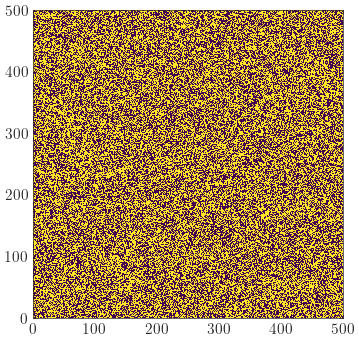

Step: 300000, Energy: -235721.27999971985


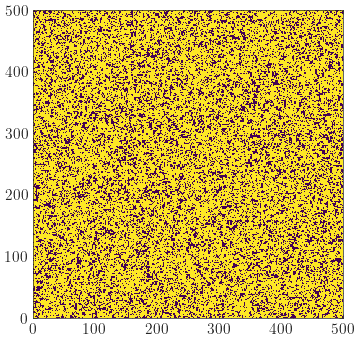

Step: 600000, Energy: -359934.6200001512


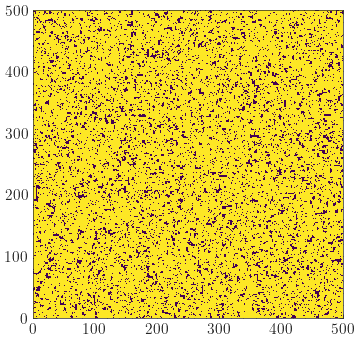

Step: 900000, Energy: -431453.0800004925


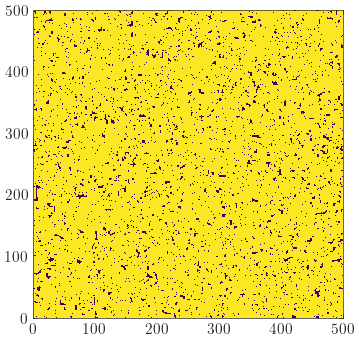

Step: 1200000, Energy: -469354.42000065395


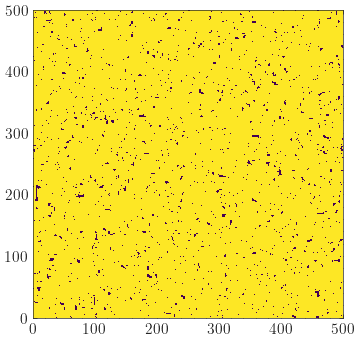

Step: 1500000, Energy: -487981.68000072776


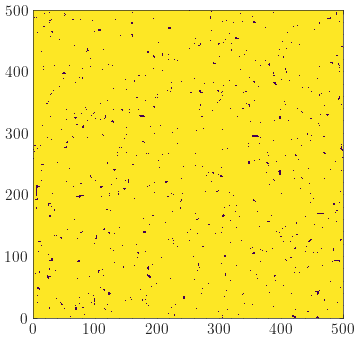

Step: 1800000, Energy: -496250.7800007586


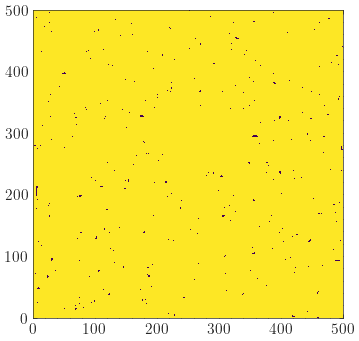

Step: 2100000, Energy: -500120.3400007712


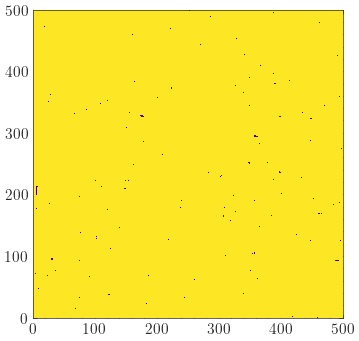

Step: 2400000, Energy: -501621.32000077586


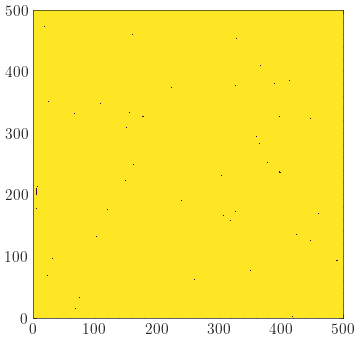

Step: 2700000, Energy: -502207.02000077744


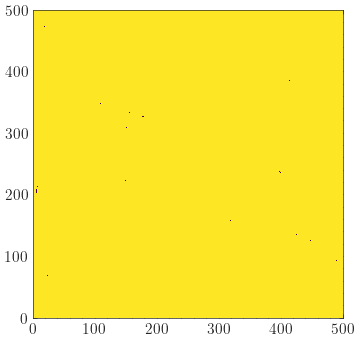

Step: 3000000, Energy: -502335.36000077776


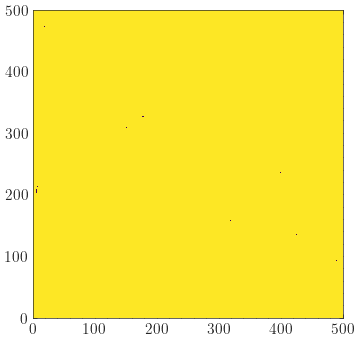

In [29]:
# --- Main Loop (Use the optimized function) ---
iters = 3000001
# iters = 500001
# iters = 250001

print_i = int(np.round((iters-1)/10))
J = 1
B = 0.01
L = 500
beta = 10**10
S = np.random.choice([-1, 1], size=(L, L)) # Simpler random init
M = 1 # Plaquette size

# Calculate Initial Energy (only once)
E = -J * np.sum(S * (np.roll(S, 1, axis=0) + np.roll(S, 1, axis=1))) # Concise periodic energy calc
E += -B * np.sum(S)

plt.figure(figsize = (4,4))
plt.pcolormesh(S, cmap = 'viridis')
# plt.title("Initial State")
# plt.savefig(f'Contours/Ising-L{L}-J{J}-B{B}-beta{beta}-C0.pdf')
plt.show()

E_tot = [] # Total Energy
m_mean = [] # mean magnetization
######## Form initial plaquette
Flips_template = -np.ones(M) 
sqrtM = np.sqrt(M)
if(M == 1): # Single Spin Plaquet
        Flips = Flips_template.reshape(1,1) 
elif(sqrtM*sqrtM==M): 
        Flips = Flips_template.reshape(int(sqrtM), int(sqrtM))
elif(M%2==0): ## Rectangular Plaquet
        Flips = Flips_template.reshape(int(M/2), 2)
else: # Column Plaquet
    Flips = Flips_template.reshape(M, 1) 
    
tol = 1E-3
for j in range(0, iters):
    S, E = Metropolis_Function_PBC(S, E, J, B, beta, L) # Call optimized func
    E_tot.append(E) # Optional: store energy
    m_mean.append(1/L**2*np.sum(S))
    if (j + 1) % (print_i) == 0: # Plot every 100k steps (adjust freq)
        print(f"Step: {j+1}, Energy: {E}")
        plt.figure(figsize = (4,4))
        plt.pcolormesh(S, cmap = 'viridis')
        # plt.title(f"State at Step {j+1}")
        plt.savefig(f'Contours/Ising-L{L}-J{J}-B{B}-beta{beta}-C{int(j+1)}.pdf')
        plt.show()


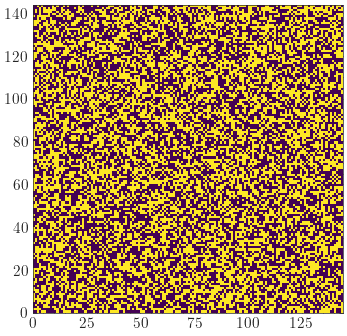

Step: 100000, Energy: -30176.0


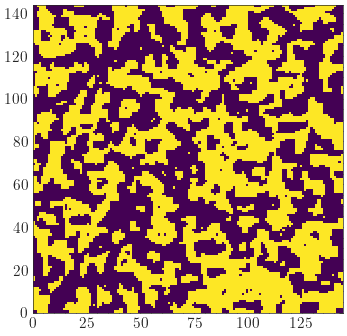

Step: 200000, Energy: -33728.0


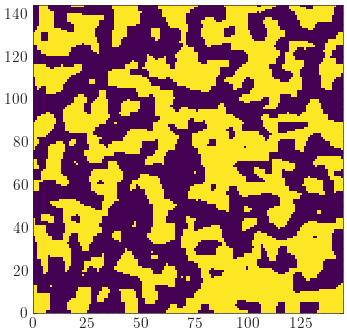

Step: 300000, Energy: -35244.0


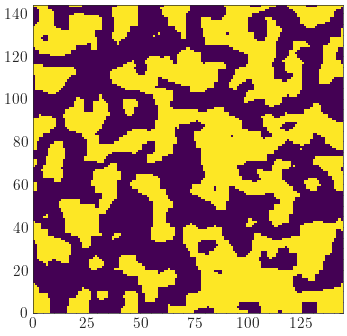

Step: 400000, Energy: -36176.0


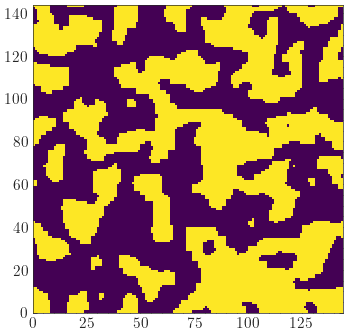

Step: 500000, Energy: -36812.0


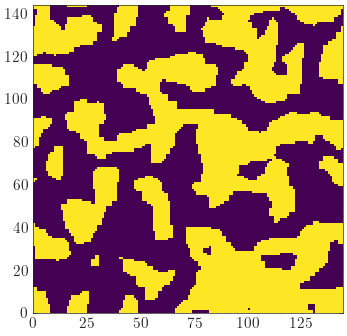

Step: 600000, Energy: -37208.0


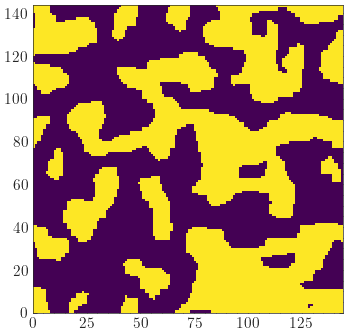

Step: 700000, Energy: -37500.0


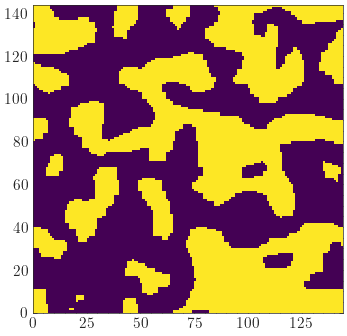

Step: 800000, Energy: -37740.0


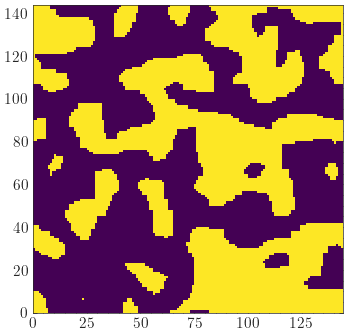

Step: 900000, Energy: -37956.0


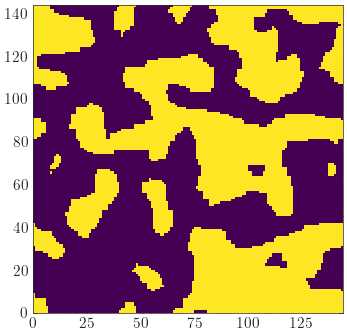

Step: 1000000, Energy: -38268.0


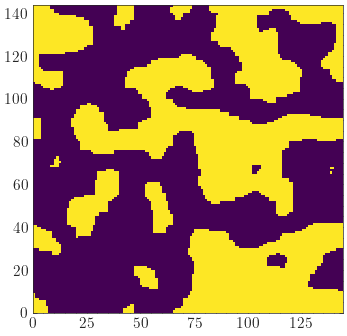

In [30]:
# --- Main Loop (Use the optimized function) ---
iters = 1000001
# iters = 500001
# iters = 250001

print_i = int(np.round((iters-1)/10))
J = 1
B = 0.0
L = 144
beta = 10**10
S = np.random.choice([-1, 1], size=(L, L)) # Simpler random init
M = 1 # Plaquette size

# Calculate Initial Energy (only once)
E = -J * np.sum(S * (np.roll(S, 1, axis=0) + np.roll(S, 1, axis=1))) # Concise periodic energy calc
E += -B * np.sum(S)

plt.figure(figsize = (4,4))
plt.pcolormesh(S, cmap = 'viridis')
# plt.title("Initial State")
# plt.savefig(f'Contours/Ising-L{L}-J{J}-B{B}-beta{beta}-C0.pdf')
plt.show()

E_tot = [] # Total Energy
m_mean = [] # mean magnetization
######## Form initial plaquette
Flips_template = -np.ones(M) 
sqrtM = np.sqrt(M)
if(M == 1): # Single Spin Plaquet
        Flips = Flips_template.reshape(1,1) 
elif(sqrtM*sqrtM==M): 
        Flips = Flips_template.reshape(int(sqrtM), int(sqrtM))
elif(M%2==0): ## Rectangular Plaquet
        Flips = Flips_template.reshape(int(M/2), 2)
else: # Column Plaquet
    Flips = Flips_template.reshape(M, 1) 
    
tol = 1E-3
for j in range(0, iters):
    S, E = Metropolis_Function_PBC(S, E, J, B, beta, L) # Call optimized func
    E_tot.append(E) # Optional: store energy
    m_mean.append(1/L**2*np.sum(S))
    if (j + 1) % (print_i) == 0: # Plot every 100k steps (adjust freq)
        print(f"Step: {j+1}, Energy: {E}")
        plt.figure(figsize = (4,4))
        plt.pcolormesh(S, cmap = 'viridis')
        # plt.title(f"State at Step {j+1}")
        # plt.savefig(f'Contours/Ising-L{L}-J{J}-B{B}-beta{beta}-C{int(j+1)}.pdf')
        plt.show()


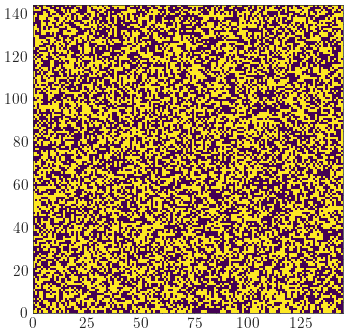

Step: 1000000, Energy: -37908.0


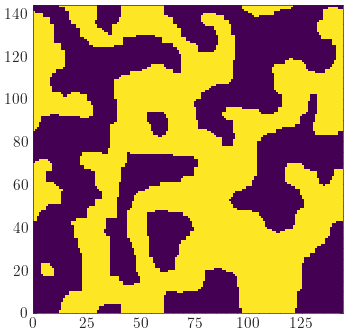

Step: 2000000, Energy: -39024.0


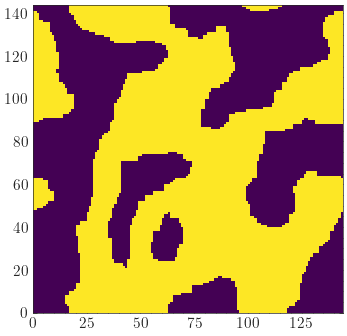

Step: 3000000, Energy: -39384.0


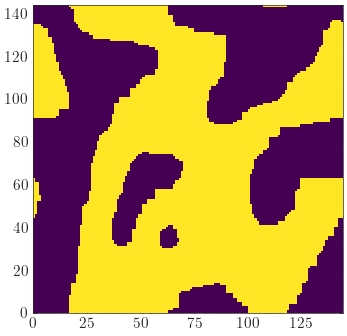

Step: 4000000, Energy: -39652.0


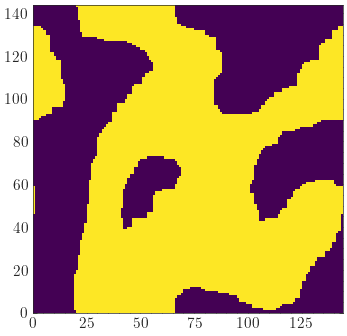

Step: 5000000, Energy: -39808.0


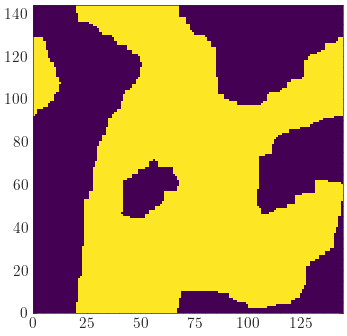

Step: 6000000, Energy: -39964.0


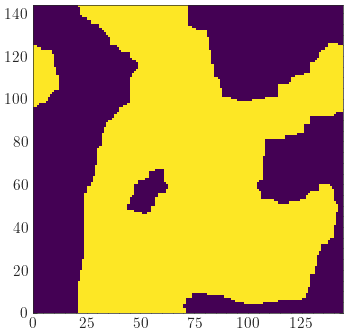

Step: 7000000, Energy: -40180.0


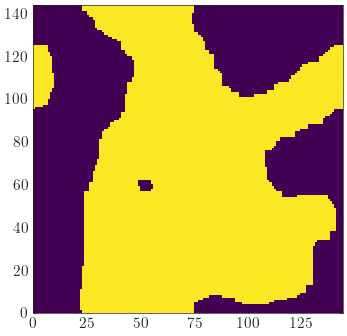

Step: 8000000, Energy: -40308.0


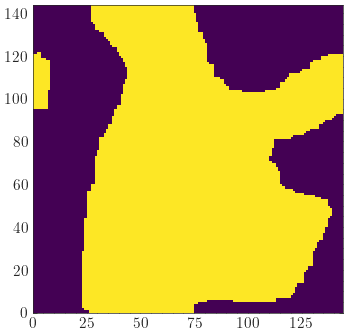

Step: 9000000, Energy: -40380.0


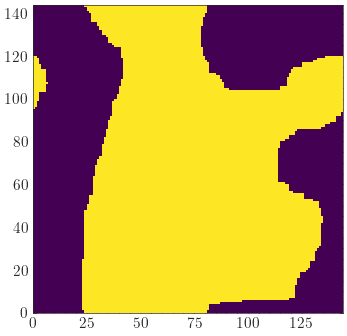

Step: 10000000, Energy: -40416.0


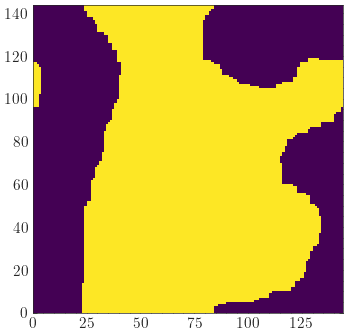

In [31]:
# --- Main Loop (Use the optimized function) ---
iters = 10000001
# iters = 500001
# iters = 250001

print_i = int(np.round((iters-1)/10))
J = 1
B = 0.0
L = 144
beta = 10**10
S = np.random.choice([-1, 1], size=(L, L)) # Simpler random init
M = 1 # Plaquette size

# Calculate Initial Energy (only once)
E = -J * np.sum(S * (np.roll(S, 1, axis=0) + np.roll(S, 1, axis=1))) # Concise periodic energy calc
E += -B * np.sum(S)

plt.figure(figsize = (4,4))
plt.pcolormesh(S, cmap = 'viridis')
# plt.title("Initial State")
# plt.savefig(f'Contours/Ising-L{L}-J{J}-B{B}-beta{beta}-C0.pdf')
plt.show()

E_tot = [] # Total Energy
m_mean = [] # mean magnetization
######## Form initial plaquette
Flips_template = -np.ones(M) 
sqrtM = np.sqrt(M)
if(M == 1): # Single Spin Plaquet
        Flips = Flips_template.reshape(1,1) 
elif(sqrtM*sqrtM==M): 
        Flips = Flips_template.reshape(int(sqrtM), int(sqrtM))
elif(M%2==0): ## Rectangular Plaquet
        Flips = Flips_template.reshape(int(M/2), 2)
else: # Column Plaquet
    Flips = Flips_template.reshape(M, 1) 
    
tol = 1E-3
for j in range(0, iters):
    S, E = Metropolis_Function_PBC(S, E, J, B, beta, L) # Call optimized func
    E_tot.append(E) # Optional: store energy
    m_mean.append(1/L**2*np.sum(S))
    if (j + 1) % (print_i) == 0: # Plot every 100k steps (adjust freq)
        print(f"Step: {j+1}, Energy: {E}")
        plt.figure(figsize = (4,4))
        plt.pcolormesh(S, cmap = 'viridis')
        # plt.title(f"State at Step {j+1}")
        # plt.savefig(f'Contours/Ising-L{L}-J{J}-B{B}-beta{beta}-C{int(j+1)}.pdf')
        plt.show()
